# Devoir 1 - Vérification de code

### A) Simplifier et établir le problème stationnaire: 

##### a. Préciser de quel type est le problème résultant en stationnaire (c’est-à-dire parabolique, hyperbolique ou elliptique, mixte)

**Réponse :** 
Équation de base:

$$\frac{\partial C}{\partial t} = D_{eff} \nabla^2 C - S$$

Pour un problème stationnaire, l'équation ne dépends pas sur le temps donc $\frac{\partial C}{\partial t} = 0$

Notre équation deviens donc: 

$$ 0= D_{eff} \nabla^2 C - S \iff S = D_{eff} \nabla^2 C$$

##### b. Préciser votre choix de système de coordonnées

**Réponse :** 
    
On utilise un système de coordonnées *cylindrique*: $$C(r,\theta, z)$$



##### c. Réduire au maximum la dimensionnalité du problème (c-à-d appliquer les simplifications de circonstances), préciser l’existence ou non de symétrie dans le domaine et justifier vos choix

**Réponse :** 

**Simplifications**

1- Hauteur infinie $\rightarrow$ le probleme ne depends pas de la hauteur $z$

2- Symetrie radiale $\rightarrow$ le probleme ne depends pas de l'angle $\theta$

Notre probleme est donc en $1D$, et ne depends que du rayon $r$: 

$$C(r)$$



##### d. Présenter en conséquence une discrétisation du domaine en Ntot=5 nœuds (faire un schéma et montrer la position exacte de tous les nœuds sur le rayon). Préciser la taille des intervalles Δr choisis

**Réponse :** 

Rayon $R = \frac{D}2 = 0.5 m$

Noeuds $N = 5$

donc $Δr = \frac{0.5}5 = 0.125m$

Ci-dessus se trouve le schéma de la discrétisation:
    

![Devoir_1\images\schema_discret.png](attachment:image.png)


##### e. D’après l’énoncé, préciser:
* les conditions frontières (et leurs types) nécessaires à la résolution du problème;

* la condition initiale requise, si nécessaire

**Réponse :** 
    
2 conditions fontières sont nécéssaires pour la résolution du problème: 

1- À $r = 0.5$: Condition de Drichlet, avec $$\left. C \right|_{r=0.5} = C_e$$

2-  À $r = 0$: Condition de Neumann, avec $$\left. \frac{\partial C}{\partial r} \right|_{r=0} = 0$$

En régime stationnaire, le problème ne requiert pas de conditions initiales.


### B) Résoudre analytiquement en considérant les conditions frontières choisies et obtenir le profil de concentration à l’état stationnaire :

##### a. Spécifiquement, montrer que le profil de concentration en sel est de forme quadratique et s’écrit comme:

$C(r) = \frac{1}{4}\,\frac{S}{D_{\mathrm{eff}}}\,R^{2}
\left(\frac{r^{2}}{R^{2}} - 1\right) + C_{e}$


**Réponse :** 
    
    Mettre réponse ici


### C) En donnant suffisamment de détails et vous basant sur les diapos du rappel concernant lesdifférences finies (cf. Moodle - diapo 4), approximer l’Éq. (1) à l’état stationnaire, avec un termesource constant, et les conditions frontières appropriées par les schémas de différenciation suivants en espace :

$\left.\frac{\partial C}{\partial r}\right|_{i}
= \frac{C_{i+1}-C_i}{\Delta r},
\qquad
\left.\frac{\partial^2 C}{\partial r^2}\right|_{i}
= \frac{C_{i+1}-2C_i+C_{i-1}}{\Delta r^2}$

##### a. Préciser l’équation obtenue en chacun des nœuds (incluant les nœuds frontières)

**Réponse :** 
    
    Mettre réponse ici

##### b. Préciser la procédure générale pour résoudre le problème

**Réponse :** 
    
    Mettre réponse ici


##### c. Préciser l’erreur de troncature et donc l’ordre de précision attendu du schéma global

**Réponse :** 
    
    Mettre réponse ici


### D) Écrire un code de calcul générique (c-à-d pour un Ntot non précisé d’avance) pour résoudre l’Éq. (1) (à l’état stationnaire et avec S constant), puis :

##### a. Tracer le profil de concentration obtenu à l’état stationnaire et comparer le à la solution analytique (Eq.(2)) - préciser clairement tous les paramètres de la simulation utilisés

**Réponse :** 
    


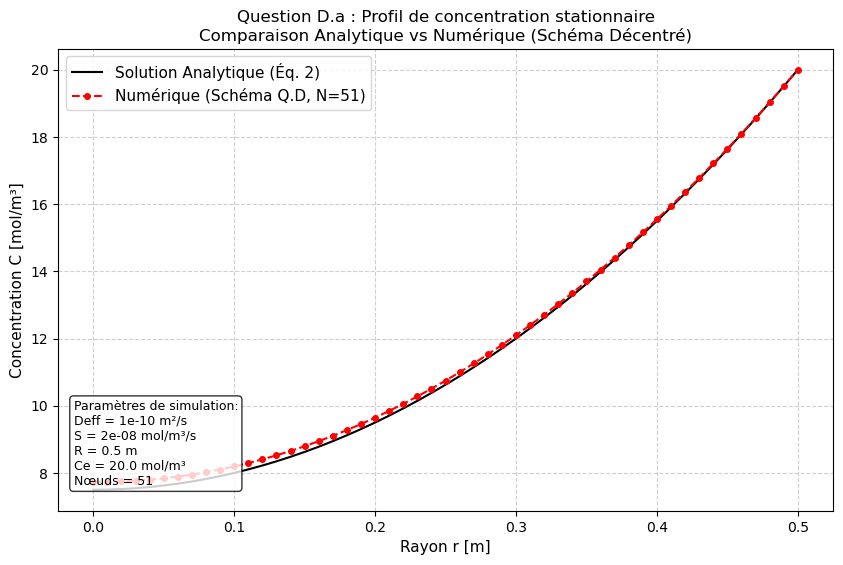

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. DÉFINITION DES PARAMÈTRES (Question D.a)
# ==========================================
# Basé sur les sources [26, 36, 38]
params = {
    'Deff': 1e-10,       # Coeff. diffusion (m^2/s)
    'S': 2e-8,           # Terme source (mol/m^3/s)
    'Ce': 20.0,          # Concentration surface (mol/m^3)
    'R': 0.5,            # Rayon du pilier (m)
    'N': 51              # Nombre de nœuds (choix arbitraire pour le tracé)
}

# Extraction pour usage local
Deff = params['Deff']
S = params['S']
Ce = params['Ce']
R = params['R']
N = params['N']

# ==========================================
# 2. SOLUTION ANALYTIQUE
# ==========================================
def solution_analytique(r_vals):
    # Équation (2) de l'énoncé [50]
    return (1/4) * (S/Deff) * (R**2) * ((r_vals**2 / R**2) - 1) + Ce

# ==========================================
# 3. RÉSOLUTION NUMÉRIQUE
# ==========================================
def solve_diffusion_schema_D(N):
    dr = R / (N - 1)
    r = np.linspace(0, R, N)
    
    # Système linéaire Ax = b
    A = np.zeros((N, N))
    b = np.zeros(N)
    const = S / Deff

    # --- Nœud 0 : Centre (r=0) ---
    # Singularité 1/r traitée par L'Hôpital : lim(1/r * dC/dr) -> d^2C/dr^2
    # L'équation devient : 2 * d^2C/dr^2 = S/Deff
    # Avec symétrie (C_-1 = C_1), schéma centré : 2 * (2*(C_1 - C_0)/dr^2) = S/Deff
    # Simplification : 4(C_1 - C_0) = (S/Deff) * dr^2
    A[0, 0] = -4.0
    A[0, 1] = 4.0
    b[0] = const * (dr**2)

    # --- Nœuds intérieurs (1 à N-2) ---
    # Schéma imposé [55] : Dérivée 1ère décentrée avant (Forward), Dérivée 2nde centrée
    # d^2C/dr^2 + (1/r)*dC/dr = S/Deff
    for i in range(1, N - 1):
        ri = r[i]
        
        # Coefficients pour : (C_i+1 - 2C_i + C_i-1)/dr^2 + (1/ri)*(C_i+1 - C_i)/dr = const
        term_diff2 = 1.0 / (dr**2)      # Facteur commun diff 2
        term_diff1 = 1.0 / (ri * dr)    # Facteur commun diff 1
        
        # C_{i-1} : Vient seulement de la dérivée seconde
        A[i, i-1] = term_diff2
        
        # C_{i}   : -2/dr^2 - 1/(r*dr)
        A[i, i]   = -2.0 * term_diff2 - term_diff1
        
        # C_{i+1} : 1/dr^2 + 1/(r*dr)
        A[i, i+1] = term_diff2 + term_diff1
        
        b[i] = const

    # --- Nœud N-1 : Surface (r=R) ---
    # Condition de Dirichlet [26]
    A[N-1, N-1] = 1.0
    b[N-1] = Ce
    
    # Résolution
    C_num = np.linalg.solve(A, b)
    return r, C_num

# ==========================================
# 4. GÉNÉRATION DU GRAPHIQUE
# ==========================================
r_num, C_num = solve_diffusion_schema_D(N)
C_ana = solution_analytique(r_num)

plt.figure(figsize=(10, 6))
plt.plot(r_num, C_ana, 'k-', linewidth=1.5, label='Solution Analytique (Éq. 2)')
plt.plot(r_num, C_num, 'r--o', markersize=4, label=f'Numérique (Schéma Q.D, N={N})')

plt.title('Question D.a : Profil de concentration stationnaire\nComparaison Analytique vs Numérique (Schéma Décentré)', fontsize=12)
plt.xlabel('Rayon r [m]', fontsize=11)
plt.ylabel('Concentration C [mol/m³]', fontsize=11)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

# Affichage des paramètres sur le graphique
info_text = (
    f"Paramètres de simulation:\n"
    f"Deff = {Deff} m²/s\n"
    f"S = {S} mol/m³/s\n"
    f"R = {R} m\n"
    f"Ce = {Ce} mol/m³\n"
    f"Nœuds = {N}"
)
plt.text(0.02, 0.05, info_text, transform=plt.gca().transAxes, 
         fontsize=9, verticalalignment='bottom', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

##### b. Faire une vérification du code appropriée comme vu en classe, en utilisant la solution analytique (Eq.(2)). Entre autres, mais pas seulement, tracer sur un même graphique les erreurs L1, L2 et L∞

**Réponse :** 
    
    Mettre réponse ici

### E) Remplacer maintenant les schémas de différenciation précédents par ceux-ci et les implanter dans votre code :

$\left.\frac{\partial C}{\partial r}\right|_{i}
= \frac{C_{i+1}-C_{i-1}}{2\,\Delta r},
\qquad
\left.\frac{\partial^2 C}{\partial r^2}\right|_{i}
= \frac{C_{i+1}-2C_i+C_{i-1}}{\Delta r^2}$



##### a. Préciser l’erreur de troncature et donc l’ordre de précision attendu de ce nouveau schéma global

**Réponse :** 
    
    Mettre réponse ici

##### b. Refaire les vérifications

**Réponse :** 
    
    Mettre réponse ici

##### c. Tracer les profils de concentration obtenus avec les deux schémas numériques (questions C/D et E) et comparer à la solution analytique (question B)

**Réponse :** 
    
    Mettre réponse ici

##### d. Que constatez-vous maintenant ? Comment expliquer le résultat obtenu ?

**Réponse :** 
    
    Mettre réponse ici